<a href="https://colab.research.google.com/github/PikoAll/machine-learning-e-deep-learning/blob/main/ClassificatoriCap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#E' consigliabile confrontare piu di un classificatore per svariati motivi, che vanno dal rumore dei dati........
#Percetron, Regressione Logistica, SVM, Albero decisionale, Random forest, K-NN

Caricamento dataset iris

In [ ]:
from sklearn import datasets
import numpy as np

iris=datasets.load_iris()
X=iris.data[:,[2,3]] #seleziono tutte le righe relative alle colonne 2 e 3
y=iris.target
print(X[:5])
print('target:',np.unique(y))

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
target: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1, stratify=y) #random_state =mescolare dataset (1 e seme casuale)
print('verifico stratificazione se è avvenuta correttamente:',np.bincount(y_train))

verifico stratificazione se è avvenuta correttamente: [35 35 35]


Standardizzare

In [ ]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
sc.fit(X_train)  #serve per stimare i parametri di media e varianza
X_trainS=sc.transform(X_train)
X_testS=sc.transform(X_test)

Ora usiamo il Percetron per la classificazione multiclasse (il percetron e di uso educativo e sconsigliato usarlo)

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn=Perceptron(eta0=0.01, random_state=1) #eta0 è il numero di epoche
ppn.fit(X_trainS,y_train)

y_pred=ppn.predict(X_testS)
print('Numero esempi classificati male:',(y_test!=y_pred).sum())

print('Accuratezza:',accuracy_score(y_test,y_pred))
print('Alternativa Accuratezza:',ppn.score(X_testS,y_test))

Numero esempi classificati male: 2
Accuratezza: 0.9555555555555556
Alternativa Accuratezza: 0.9555555555555556


Plot 

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

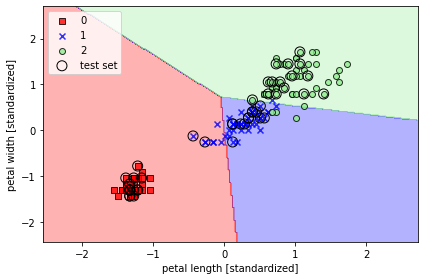

In [ ]:
X_combined_std = np.vstack((X_trainS, X_testS))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

Regressione logistica (non confodere il nome) e un modello di classificazione enon di regressione
viene usata nelle predizioni metereologiche e nella medicina principalmente

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')  #e consigliato usare multi_class=multinomial per classi reciprocamente esaustive come sarebbe iris, uso ovr per vedere come si comporta questo parametro
#il parametro solver viene settatto per algoritmi di ottimizzazione, ci sono lbfgs,liblinear,sag e saga

lr.fit(X_trainS,y_train)
y_pred=lr.predict(X_testS)

print('Accuratezza:',lr.score(X_testS,y_test))

print('prediciamo la probabilita dei primi 3esempio per l\'appartenenza ad una classe')
print(lr.predict_proba(X_testS[:3,:]))

Accuratezza: 0.9777777777777777
prediciamo la probabilita dei primi 3esempio per l'appartenenza ad una classe
[[3.81527885e-09 1.44792866e-01 8.55207131e-01]
 [8.34020679e-01 1.65979321e-01 3.25737138e-13]
 [8.48831425e-01 1.51168575e-01 2.62277619e-14]]


SVM (Macchine a Vettori di Supporto) può essere considerato un'estensione del percetron

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=)
svm.fit(X_trainS,y_train)

print('accuratezza:',svm.score(X_testS,y_test))

accuratezza: 0.9777777777777777


Albero Decisionale

Accuratezza 0.9777777777777777


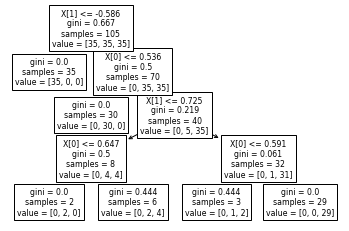

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)  #criterio di impurita gini, profondita massima 4
tree_model.fit(X_trainS,y_train)

print('Accuratezza',tree_model.score(X_testS,y_test))

#per visualizzare l'albero
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

Random Forest miglioria dell'Albero decisionale

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion='gini',n_estimators=25,random_state=1,n_jobs=2) #utiliziamo 25 alberi, n_jobs ci serve per indicare il numero di core da utilizzare per paralellizzare la procedura

forest.fit(X_trainS,y_train)
print('Accuratezza:',forest.score(X_testS,y_test))

Accuratezza: 0.9777777777777777


K-NNun algoritmo di apprendimento pigro

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

knn.fit(X_trainS,y_train)
print('Accuratezza:',knn.score(X_testS,y_test))

Accuratezza: 1.0
